In [8]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
data = pd.read_csv('Advertising.csv')
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.1

In [9]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [11]:
print(data.shape)

(200, 5)


In [12]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [13]:
# Checking for null values
print(data.isna().sum())
print(data.describe())


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [14]:
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


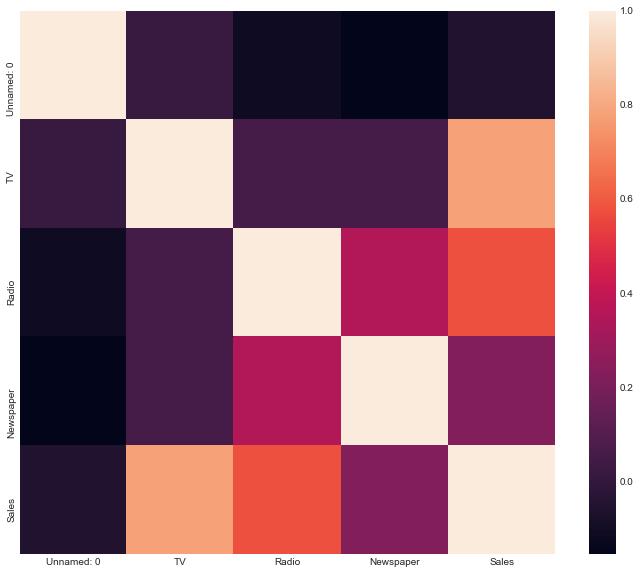

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

In [16]:
x = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

data = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(data)

    Predicted Sales
0         16.412277
1         20.843193
2         21.511869
3         10.653100
4         22.124058
5         13.123835
6         21.037489
7          7.503854
8         13.647870
9         15.120409
10         9.020556
11         6.706666
12        14.401551
13         8.886090
14         9.743533
15        12.215520
16         8.713709
17        16.294145
18        10.268023
19        18.804982
20        19.588647
21        13.223183
22        12.364787
23        21.314736
24         7.797347
25         5.781900
26        20.749348
27        11.954767
28         9.199109
29         8.521787
30        12.404313
31         9.948652
32        21.368803
33        12.253748
34        18.299435
35        20.133474
36        14.074646
37        20.885947
38        11.052150
39         4.551687
